In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/rajtilakls2510/car_price_predictor/master/quikr_car.csv")

In [3]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
data.shape

(892, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
data.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [7]:
data.name.unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

# Data quality
-year has many non-year values
-year object to int 
- Price has ask for price
-Prices object to int and remove comma
-kms driven has nan-values
-fuel type has nan vlaue
-keep 1st 3 word of name

In [8]:
backup=data.copy()

In [9]:
def carname(name):
  name=name.split()
  name=name[:3]
  name=" ".join(name)
  return name


In [10]:
data.name=data.name.apply(carname)

In [11]:
data.name

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
2          Maruti Suzuki Alto
3           Hyundai Grand i10
4      Ford EcoSport Titanium
                ...          
887                        Ta
888              Tata Zest XM
889        Mahindra Quanto C8
890           Honda Amaze 1.2
891        Chevrolet Sail 1.2
Name: name, Length: 892, dtype: object

In [12]:
data.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [13]:


data=data[data['year'].str.isnumeric()]

In [14]:
data['year']=data['year'].astype(int)

<ipython-input-14-e19c73e51144>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year']=data['year'].astype(int)


In [15]:
data=data[data['Price']!='Ask For Price']

In [16]:
data['Price']=data['Price'].str.replace(',','').astype(int)

In [17]:
data['kms_driven']=data['kms_driven'].str.split().str.get(0).str.replace(',','')

In [18]:
data=data[data['kms_driven'].str.isnumeric()]

In [19]:
data["kms_driven"]=data["kms_driven"].astype(int)

In [20]:
data=data[~data['fuel_type'].isna()]

In [21]:
data=data.reset_index(drop=True)

In [22]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [24]:
data["fuel_type"]=data["fuel_type"].astype("category")

In [25]:
data.to_csv('Cleaned_Car_data.csv')

In [26]:
data.describe(include="all")

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [27]:
data=data[data["Price"]<6e6]

# **EDA**

In [28]:
#Univariate analysis

<ipython-input-29-3e970051e81f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Price"])


<Axes: xlabel='Price', ylabel='Density'>

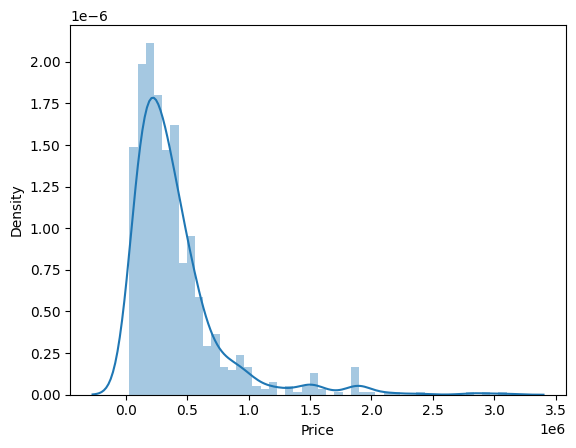

In [29]:
sns.distplot(data["Price"])

<Axes: >

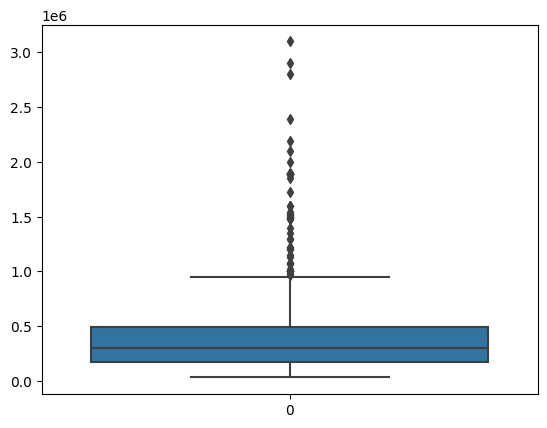

In [30]:
sns.boxplot(data["Price"])

In [31]:
data=data[data["Price"]<2e6]

In [32]:
data.shape

(808, 6)

In [33]:
company=data.company.value_counts().reset_index()
company=company.rename(columns={"index":"Company_name","company":"count"})

<BarContainer object of 23 artists>

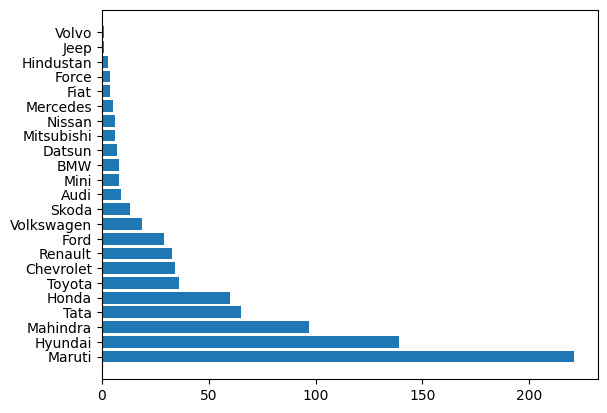

In [34]:
fig,ax=plt.subplots()

ax.barh(company["Company_name"],company["count"])

<ipython-input-35-c4f3a7f13105>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["year"])


<Axes: xlabel='year', ylabel='Density'>

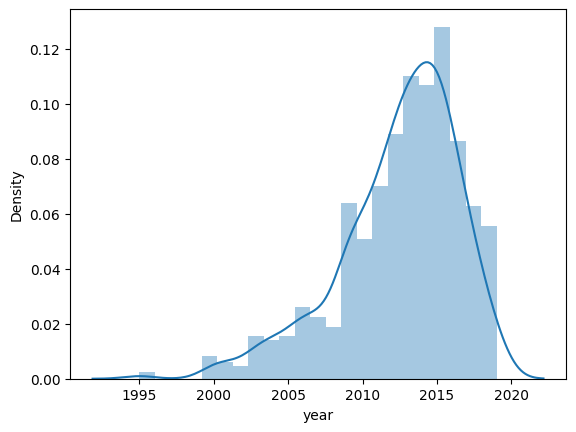

In [35]:
sns.distplot(data["year"])

<Axes: >

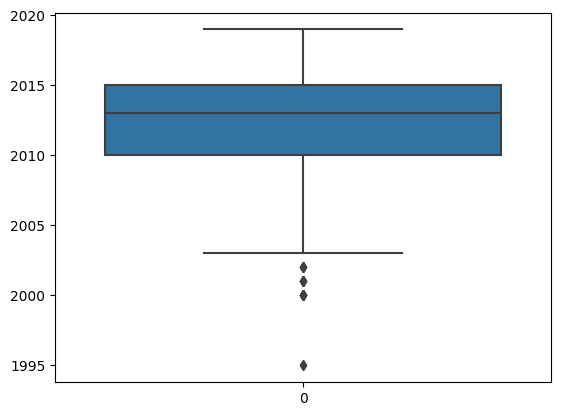

In [36]:
sns.boxplot(data["year"])

In [37]:
data=data[data["year"]>2000]

In [38]:
data=data.reset_index(drop=True)

<ipython-input-39-8bff5f951fab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["kms_driven"])


<Axes: xlabel='kms_driven', ylabel='Density'>

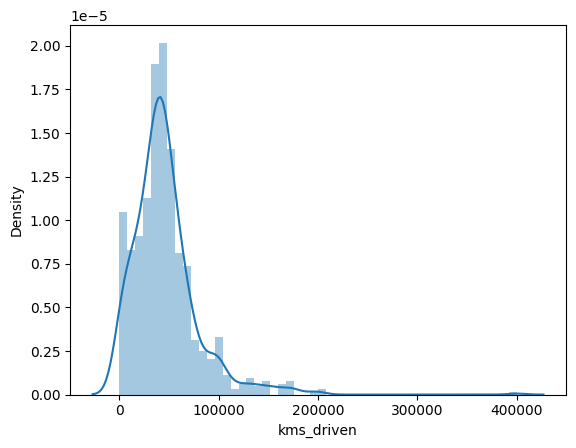

In [39]:
sns.distplot(data["kms_driven"])

<Axes: >

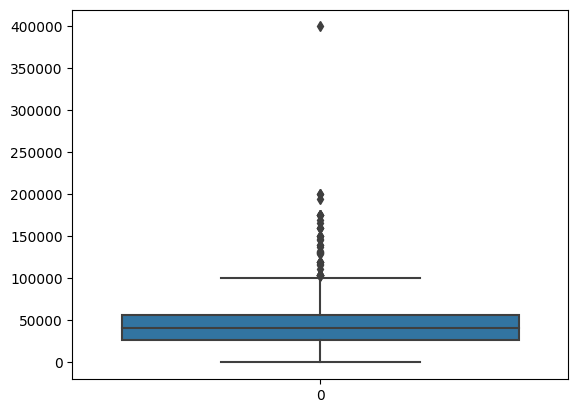

In [40]:
sns.boxplot(data["kms_driven"])

In [42]:
#multivaiate analysis

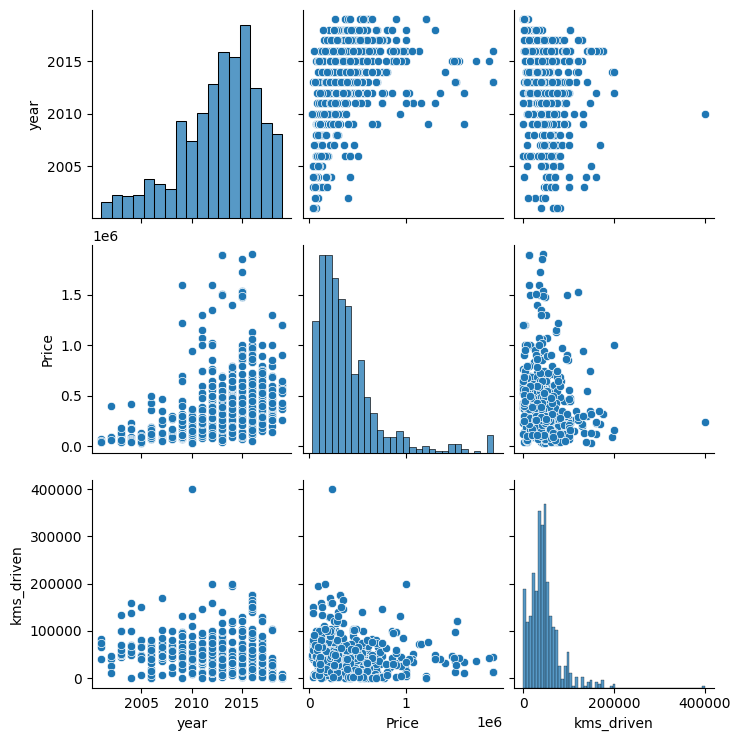

In [43]:
sns.pairplot(data)

In [44]:
data.corr()

<ipython-input-44-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,year,Price,kms_driven
year,1.000000,0.365967,-0.219089
Price,0.365967,1.000000,-0.124213
kms_driven,-0.219089,-0.124213,1.000000


In [45]:
data["name"]=data["name"].astype("category")
data["company"]=data["company"].astype("category")

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        799 non-null    category
 1   company     799 non-null    category
 2   year        799 non-null    int64   
 3   Price       799 non-null    int64   
 4   kms_driven  799 non-null    int64   
 5   fuel_type   799 non-null    category
dtypes: category(3), int64(3)
memory usage: 32.9 KB


In [47]:
data1=pd.get_dummies(data,drop_first=True)

In [48]:
x=data.drop(["Price"],axis=1)
y=data["Price"]


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [50]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [51]:
from sklearn.preprocessing import  OneHotEncoder
ohe=OneHotEncoder()

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [53]:
ohe.fit(x[["name","company","fuel_type"]])

OneHotEncoder()

In [54]:
ohe.categories_

[array(['Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0', 'Audi A8',
        'Audi Q3 2.0', 'Audi Q7', 'BMW 3 Series', 'BMW 5 Series',
        'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d', 'BMW X1 xDrive20d',
        'Chevrolet Beat', 'Chevrolet Beat Diesel', 'Chevrolet Beat LS',
        'Chevrolet Beat LT', 'Chevrolet Beat PS', 'Chevrolet Cruze LTZ',
        'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4', 'Chevrolet Sail 1.2',
        'Chevrolet Sail UVA', 'Chevrolet Spark', 'Chevrolet Spark 1.0',
        'Chevrolet Spark LS', 'Chevrolet Spark LT', 'Chevrolet Tavera LS',
        'Chevrolet Tavera Neo', 'Datsun GO T', 'Datsun Go Plus',
        'Datsun Redi GO', 'Fiat Linea Emotion', 'Fiat Petra ELX',
        'Fiat Punto Emotion', 'Force Motors Force', 'Force Motors One',
        'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend', 'Ford Fiesta',
        'Ford Fiesta SXi', 'Ford Figo', 'Ford Figo Diesel',
        'Ford Figo Duratorq', 'Ford Figo Petro

In [55]:
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

In [56]:
cols_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),["name","company","fuel_type"]),remainder="passthrough")

In [57]:
pipe=make_pipeline(cols_trans,model)

In [58]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0', 'Audi A8',
       'Audi Q3 2.0', 'Audi Q7', 'BMW 3 Series', 'BMW 5 Series',
       'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d', 'BMW X1 xDrive20d',
       'Chevrolet Beat', 'Chevrolet Beat Diesel', 'Chevrolet Beat LS',
       'Che...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jeep', 'Mahindra', 'Maruti',
       'Mercedes', 'Mini', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [59]:
y_predict=pipe.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

In [61]:
r2_score(y_test,y_predict)

0.6742144285447385

In [62]:
score=[]
for i in range(1000):
  x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=i)
  lr=LinearRegression()
  pipe=make_pipeline(cols_trans,lr)
  pipe.fit(x_tr,y_tr)
  y_p=pipe.predict(x_te)
  score.append(r2_score(y_te,y_p))



In [63]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=np.argmax(score))
lr=LinearRegression()
pipe=make_pipeline(cols_trans,lr)
pipe.fit(x_tr,y_tr)
y_p=pipe.predict(x_te)
r2_score(y_te,y_p)

0.8696089877757245

In [64]:
score[223]

0.8296308797778543

In [65]:
import pickle

In [66]:
pickle.dump(pipe,open("LinearRegressionModel.pkl","wb"))

In [67]:
data.sample()

,name,company,year,Price,kms_driven,fuel_type
702,Chevrolet Tavera LS,Chevrolet,2005,130000,68485,Diesel


In [68]:
pipe.predict(pd.DataFrame([["Maruti Suzuki Swift","Maruti",2019,100,"Petrol"]],columns=["name","company","year","kms_driven","fuel_type"]))

array([440987.43415881])